# 任务一：基于机器学习的文本分类
    - softmax 回归
    - 交叉熵损失函数
    - 梯度下降

## 参考
[代码框架](https://blog.csdn.net/Raki_J/article/details/121796404)

[数据集及原理详解](https://blog.csdn.net/qq_42365109/article/details/114844020)

In [4]:
import numpy as np
import pandas as pd

In [5]:
train_df = pd.read_csv('../data/train.tsv', sep='\t')
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
X_data,y_data = train_df["Phrase"].values, train_df["Sentiment"].values

In [7]:
from feature import BagOfWords,Ngram
from softmax_regression import Softmax_regression

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
y_data

array([1, 2, 2, ..., 3, 2, 2], dtype=int64)

## 原理

### softmax

![softmax](./softmax.png)

求解W

### loss

![单个样本损失函数](./loss_function.png)

总损失函数求平均

## gradiant

![梯度下降公式](https://img-blog.csdnimg.cn/9561069c476246be857a2ef0d30964e3.png)

test

In [10]:
test = 10000

In [11]:
X_data = X_data[:test]
y_data = y_data[:test]

bag = BagOfWords(X_data)
gram = Ngram(X_data,N=2)

X_b = bag.get_feature_matrix()
X_g = gram.get_feature_matrix()

y = np.array(y_data).reshape((-1, 1))
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y, test_size=0.2, random_state=42, stratify=y)   #按y中各类比例，分配给train和test
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y, test_size=0.2, random_state=42, stratify=y) 


In [12]:
epochs = 100
learning_rate = 10

epoch 10 loss [1.56627523]
epoch 20 loss [1.43409952]
epoch 30 loss [1.33624061]
epoch 40 loss [1.26000459]
epoch 50 loss [1.19867466]
epoch 60 loss [1.14833286]
epoch 70 loss [1.10620711]
epoch 80 loss [1.07029282]
epoch 90 loss [1.03916583]
epoch 100 loss [1.01184952]


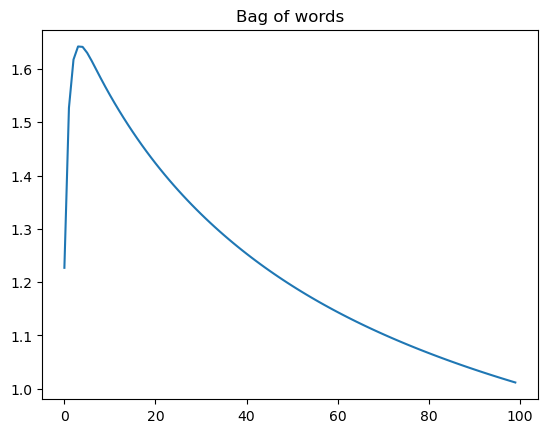

Bow train 0.426375 test 0.352


In [13]:
model1 = Softmax_regression()
loss1 = model1.fit(X_train_b,y_train_b,learning_rate=learning_rate,epochs=epochs)
plt.title('Bag of words')
plt.plot(np.arange(len(loss1)), np.array(loss1))
plt.show()
print("Bow train {} test {}".format(model1.score(X_train_b, y_train_b), model1.score(X_test_b, y_test_b)))

epoch 10 loss [1.90816833]
epoch 20 loss [1.6894827]
epoch 30 loss [1.51160769]
epoch 40 loss [1.37843588]
epoch 50 loss [1.27579849]
epoch 60 loss [1.19602181]
epoch 70 loss [1.13373613]
epoch 80 loss [1.08268618]
epoch 90 loss [1.03954198]
epoch 100 loss [1.0027116]


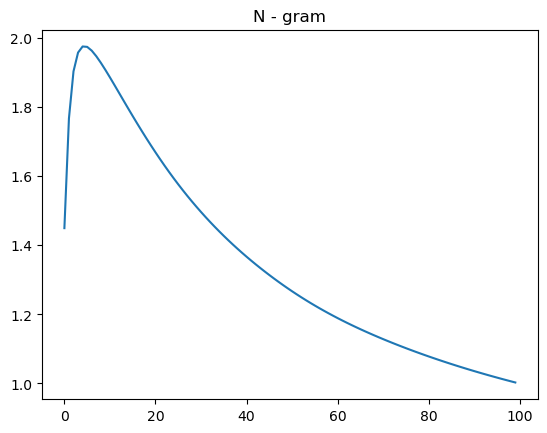

N-gram train 0.446 test 0.3825


In [14]:
model2 = Softmax_regression()
loss2 = model2.fit(X_train_g,y_train_g,learning_rate=learning_rate,epochs=epochs)
plt.title('N - gram')
plt.plot(np.arange(len(loss2)), np.array(loss2))
plt.show()
print("N-gram train {} test {}".format(model2.score(X_train_g, y_train_g), model2.score(X_test_g, y_test_g)))